<a href="https://colab.research.google.com/github/nanda1296/Predictive-Analytics-for-Real-Estate/blob/main/Project_Group_A13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/content/Spring 2023 - AISC - Nest Analytics_Toronto_housing_data_.xlsx')
df.head()

,Unnamed: 0,Land Use,Property Address,Suite/ Condo #,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,RESIDENTIAL CONDO,1208 3RD AVE S,8,2013-01-24,132000,20130128-0008725,No,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,SINGLE FAMILY,1802 STEWART PL,NaN,2013-01-11,191500,20130118-0006337,No,No,"STINSON, LAURA M.",...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,SINGLE FAMILY,2761 ROSEDALE PL,NaN,2013-01-18,202000,20130124-0008033,No,No,"NUNES, JARED R.",...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,SINGLE FAMILY,224 PEACHTREE ST,NaN,2013-01-18,32000,20130128-0008863,No,No,"WHITFORD, KAREN",...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,SINGLE FAMILY,316 LUTIE ST,NaN,2013-01-23,102000,20130131-0009929,No,No,"HENDERSON, JAMES P. & LYNN P.",...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [3]:
df.shape

(56636, 25)

In [4]:
df = df.drop(df.columns[0],axis=1)
df.head()

,Land Use,Property Address,Suite/ Condo #,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,Address,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,RESIDENTIAL CONDO,1208 3RD AVE S,8,2013-01-24,132000,20130128-0008725,No,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SINGLE FAMILY,1802 STEWART PL,NaN,2013-01-11,191500,20130118-0006337,No,No,"STINSON, LAURA M.",1802 STEWART PL,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,SINGLE FAMILY,2761 ROSEDALE PL,NaN,2013-01-18,202000,20130124-0008033,No,No,"NUNES, JARED R.",2761 ROSEDALE PL,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,SINGLE FAMILY,224 PEACHTREE ST,NaN,2013-01-18,32000,20130128-0008863,No,No,"WHITFORD, KAREN",224 PEACHTREE ST,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,SINGLE FAMILY,316 LUTIE ST,NaN,2013-01-23,102000,20130131-0009929,No,No,"HENDERSON, JAMES P. & LYNN P.",316 LUTIE ST,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


#Data Exploration

<ipython-input-5-fd379e3fb4a4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


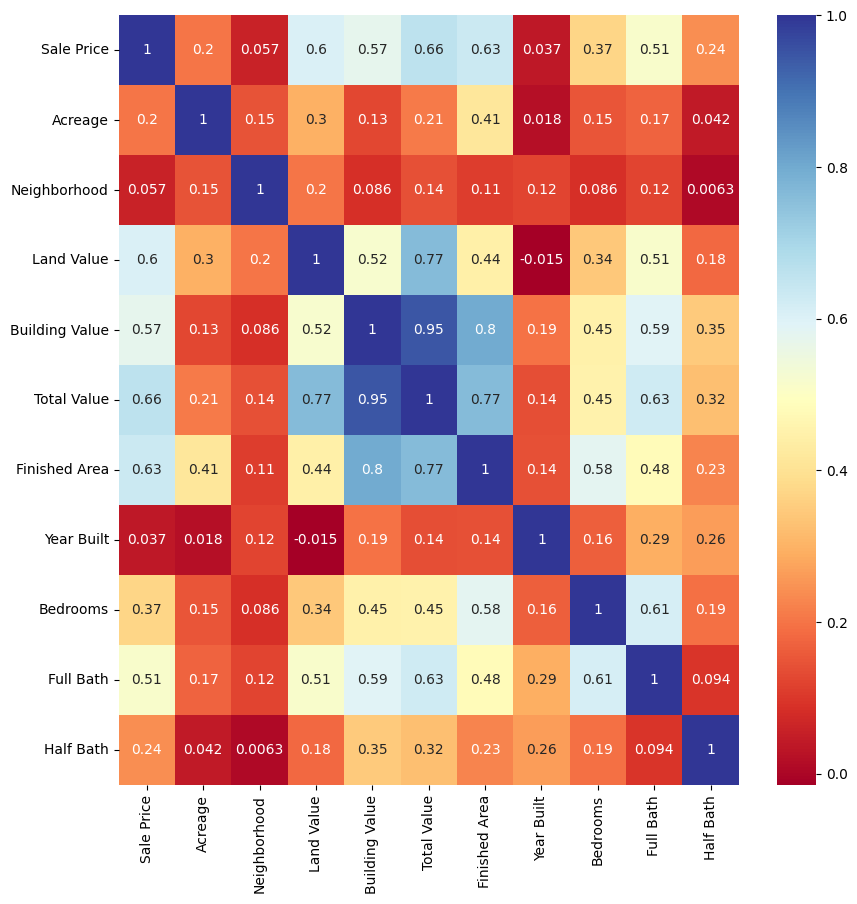

In [5]:
X = df.iloc[:,0:23]
y = df.iloc[:,4]

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlBu")

In [6]:
df = df.drop(df.columns[[2,3,5,8,9,11,-7,-5]], axis=1)
df.head()

,Land Use,Property Address,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Grade,Bedrooms,Full Bath,Half Bath
0,RESIDENTIAL CONDO,1208 3RD AVE S,132000,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SINGLE FAMILY,1802 STEWART PL,191500,No,No,0.17,3127.0,32000.0,134400.0,168300.0,1149.00000,1941.0,C,2.0,1.0,0.0
2,SINGLE FAMILY,2761 ROSEDALE PL,202000,No,No,0.11,9126.0,34000.0,157800.0,191800.0,2090.82495,2000.0,C,3.0,2.0,1.0
3,SINGLE FAMILY,224 PEACHTREE ST,32000,No,No,0.17,3130.0,25000.0,243700.0,268700.0,2145.60001,1948.0,B,4.0,2.0,0.0
4,SINGLE FAMILY,316 LUTIE ST,102000,No,No,0.34,3130.0,25000.0,138100.0,164800.0,1969.00000,1910.0,C,2.0,1.0,0.0


In [7]:
df = df.dropna(axis='rows')
df

,Land Use,Property Address,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Grade,Bedrooms,Full Bath,Half Bath
1,SINGLE FAMILY,1802 STEWART PL,191500,No,No,0.17,3127.0,32000.0,134400.0,168300.0,1149.00000,1941.0,C,2.0,1.0,0.0
2,SINGLE FAMILY,2761 ROSEDALE PL,202000,No,No,0.11,9126.0,34000.0,157800.0,191800.0,2090.82495,2000.0,C,3.0,2.0,1.0
3,SINGLE FAMILY,224 PEACHTREE ST,32000,No,No,0.17,3130.0,25000.0,243700.0,268700.0,2145.60001,1948.0,B,4.0,2.0,0.0
4,SINGLE FAMILY,316 LUTIE ST,102000,No,No,0.34,3130.0,25000.0,138100.0,164800.0,1969.00000,1910.0,C,2.0,1.0,0.0
5,SINGLE FAMILY,2626 FOSTER AVE,93736,No,No,0.17,3130.0,25000.0,86100.0,113300.0,1037.00000,1945.0,C,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56605,SINGLE FAMILY,5004 SUNSHINE DR,214000,No,No,0.27,6328.0,25000.0,142400.0,167400.0,2421.00000,1996.0,C,3.0,3.0,0.0
56607,SINGLE FAMILY,4964 HICKORY WOODS E,236000,No,No,0.23,6328.0,25000.0,159300.0,184300.0,3117.00000,1995.0,C,3.0,3.0,0.0
56614,SINGLE FAMILY,1625 5TH AVE N,466000,No,No,0.15,126.0,40000.0,204100.0,256000.0,1637.00000,2004.0,B,3.0,2.0,1.0
56615,SINGLE FAMILY,1614 5TH AVE N,685000,No,No,0.19,126.0,40000.0,295900.0,351600.0,2478.00000,2005.0,B,4.0,3.0,1.0


The Datset consists of 16 features & 24012 samples after removing the null values

In [8]:
#checking the data types of all the features
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24012 entries, 1 to 56616
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Land Use                           24012 non-null  object 
 1   Property Address                   24012 non-null  object 
 2   Sale Price                         24012 non-null  int64  
 3   Sold As Vacant                     24012 non-null  object 
 4   Multiple Parcels Involved in Sale  24012 non-null  object 
 5   Acreage                            24012 non-null  float64
 6   Neighborhood                       24012 non-null  float64
 7   Land Value                         24012 non-null  float64
 8   Building Value                     24012 non-null  float64
 9   Total Value                        24012 non-null  float64
 10  Finished Area                      24012 non-null  float64
 11  Year Built                         24012 non-null  flo

In [9]:
#Checking for unique rows in each feature
df.nunique().sort_values()

Sold As Vacant                           2
Multiple Parcels Involved in Sale        2
Half Bath                                4
Full Bath                               11
Bedrooms                                12
Grade                                   17
Land Use                                26
Year Built                             126
Neighborhood                           190
Acreage                                427
Land Value                             937
Sale Price                            3770
Building Value                        4389
Total Value                           5616
Finished Area                         6090
Property Address                     21544
dtype: int64

In [10]:
df.describe()

,Sale Price,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
count,2.401200e+04,24012.000000,24012.000000,2.401200e+04,2.401200e+04,2.401200e+04,24012.000000,24012.000000,24012.000000,24012.000000,24012.000000
mean,2.749526e+05,0.454356,4424.299475,6.894467e+04,1.722886e+05,2.438883e+05,1914.921571,1963.655672,3.090955,1.892679,0.285441
std,3.031357e+05,0.789893,2138.216933,1.018887e+05,1.927322e+05,2.711758e+05,1103.567263,26.439202,0.851894,0.954341,0.488747
min,1.000000e+02,0.040000,107.000000,1.000000e+02,1.400000e+03,1.260000e+04,450.000000,1799.000000,0.000000,0.000000,0.000000
25%,1.250000e+05,0.190000,3130.000000,2.190000e+04,8.350000e+04,1.094000e+05,1236.000000,1948.000000,3.000000,1.000000,0.000000
50%,1.850000e+05,0.270000,4026.000000,2.990000e+04,1.171000e+05,1.542000e+05,1629.500000,1960.000000,3.000000,2.000000,0.000000
75%,3.249000e+05,0.450000,6229.000000,6.030000e+04,1.885000e+05,2.778000e+05,2211.000000,1983.000000,3.000000,2.000000,1.000000
max,1.075000e+07,47.500000,9530.000000,1.869000e+06,5.824300e+06,6.402600e+06,19728.249880,2017.000000,11.000000,10.000000,3.000000


In [11]:
df.isnull().sum()

Land Use                             0
Property Address                     0
Sale Price                           0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
Acreage                              0
Neighborhood                         0
Land Value                           0
Building Value                       0
Total Value                          0
Finished Area                        0
Year Built                           0
Grade                                0
Bedrooms                             0
Full Bath                            0
Half Bath                            0
dtype: int64

#Exploratory Data Analysis (EDA)

<ipython-input-12-1a8efd427738>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  vis1 = sns.distplot(df['Sale Price'], bins=40, color='red', kde=True, hist_kws=dict(edgecolor='black', linewidth=2),ax= ax[0][0])
<ipython-input-12-1a8efd427738>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  vis2 = sns.distplot(df['Land V

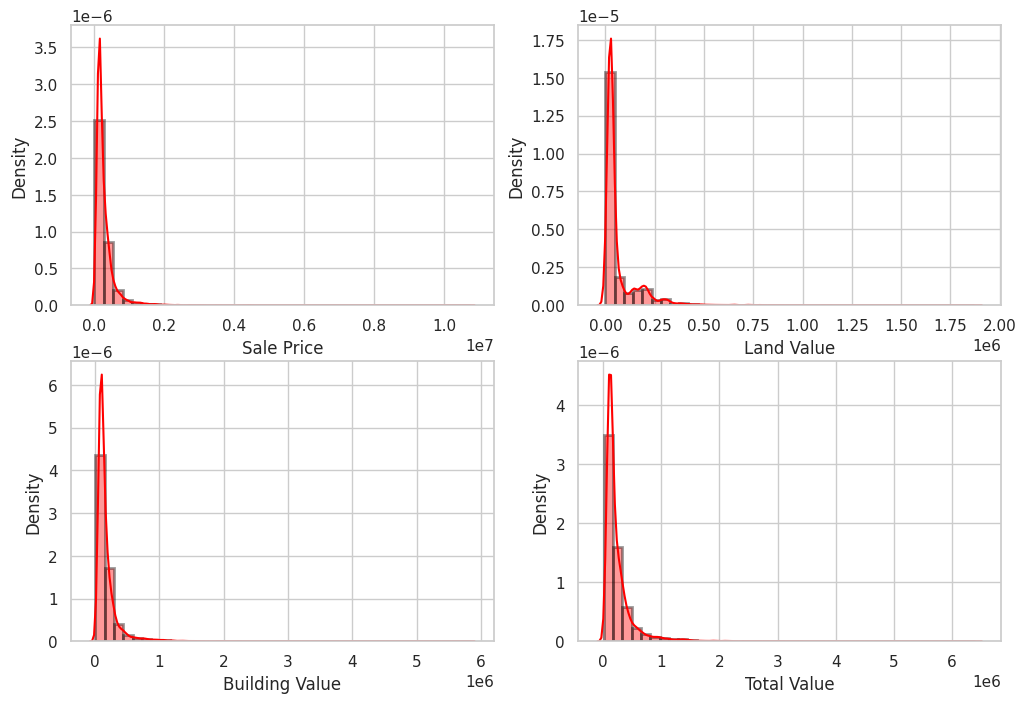

In [12]:
sns.set(style='whitegrid')
f, ax = plt.subplots(2,2,figsize = (12,8))

vis1 = sns.distplot(df['Sale Price'], bins=40, color='red', kde=True, hist_kws=dict(edgecolor='black', linewidth=2),ax= ax[0][0])
vis2 = sns.distplot(df['Land Value'], bins=40, color='red', kde=True, hist_kws=dict(edgecolor='black', linewidth=2),ax= ax[0][1])
vis3 = sns.distplot(df['Building Value'], bins=40, color='red', kde=True, hist_kws=dict(edgecolor='black', linewidth=2),ax= ax[1][0])
vis4 = sns.distplot(df['Total Value'], bins=40, color='red', kde=True, hist_kws=dict(edgecolor='black', linewidth=2),ax= ax[1][1])

plt.show()

In [13]:
#skewness and kurtosis
print("Skewness: %f" % df['Sale Price'].skew())
print("Kurtosis: %f" % df['Sale Price'].kurt())

Skewness: 6.485459
Kurtosis: 104.433070


In [16]:
col = list(df.columns)
categorical_features = []
numerical_features = []

for i in col:
  unique_values = df[i].unique()
  if unique_values > 3:
      numerical_features.append(i)
  else:
      categorical_features.append(i)

print('Categorical Features: ', categorical_features)
print('Numerical Features: ', numerical_features)


TypeError: ignored

In [ ]:
df[categorical_features].head()